# Clase 3 - Aprendizaje Automático 2023
# Contenidos

* Evaluación de modelos
* Generalización
* Split train-test

* Complejidad de modelos
* Balance sesgo/varianza
* Curva de complejidad

* Validación cruzada y busqueda de hiperparametros





# Evaluación de modelos y generalización

Referencia: Data Science from Scratch, 2nd Edition by Joel Grus https://www.oreilly.com/library/view/data-science-from/9781492041122/

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Evaluación de modelos y Generalización: Regresión Simple con Scipy
En este notebook vamos a explorar cómo evaluar un modelo de regresión simple en Python utilizando Scipy y Pandas. Para ello, vamos a trabajar con un conjunto de datos de ejemplo para hacer una regresión lineal simple.

### Aprendizaje automático (Machine Learning)

El término aprendizaje automático refiere a la creación y uso de modelos que se **aprenden a partir de datos**.

Como vimos en la clase teórica, se utilizan datos existentes para desarrollar modelos que se pueden usar para predecir diversos resultados para nuevos datos, como:

• Si un mensaje de correo electrónico es spam o no

• Si una transacción con tarjeta de crédito es fraudulenta

• En qué anuncio publicitario es más probable que un comprador haga clic



## Modelos.

¿Qué es un modelo? Un modelo una **especificación** de una **relación** matemática (o probabilística) que existe entre diferentes variables.

Por ejemplo, si estás tratando de recaudar dinero para tu sitio de redes sociales, podrías construir un modelo de negocio (probablemente en una hoja de cálculo) que tome entradas como "número de usuarios", "ingresos por publicidad por usuario" y "número de empleados" y produzca tus ganancias anuales para los próximos años. Una receta de cocina implica un modelo que relaciona entradas como "número de comensales" y "hambre" con las cantidades de ingredientes necesarios.

### Cargar y visualizar datos

Primero, cargaremos los datos y visualizaremos una muestra para tener una idea general de cómo se ven.

In [19]:
from sklearn.datasets import load_diabetes

diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
df_diabetes['target'] = diabetes_data['target']

Vemos qué columnas tiene df_diabetes

In [20]:
df_diabetes.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Veamos los datos. ¿Por qué los valores como edad o sexo son números pequeños?

In [21]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Y aplicamos .describe() para visualizar información general de cada variable.

In [22]:
df_diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Si bien es un dataset descargado de una libreria, y esperamos que este limpio (y sin nans), chequeamos la existencia de nulos:

In [23]:
# Contar valores faltantes
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### Posible riesgo de modelar datos

Un riesgo frecuente al trabajar con bases de datos en el aprendizaje automático es el de producir un modelo que funciona bien en los datos de entrenamiento, pero que generaliza mal para cualquier dato nuevo. 

Esto podría ocurrir por aprender ruido en los datos, o por aprender a identificar entradas específicas en lugar de los factores que son realmente predictivos para el resultado deseado. 

El otro lado de esto es producir un modelo que no funciona bien incluso en los datos de entrenamiento, aunque típicamente cuando esto sucede, se decide que el modelo no es lo suficientemente bueno y se sigue buscando uno mejor.

#### Ejemplo

Veamos a continuación un ejemplo simple de esto ajustado tres polinomios a una muestra de datos (recuerden que la idea de esta sección es tomar el concepto, no se preocupen si no siguen el código):

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de muestra
np.random.seed(123)
x = np.linspace(-2, 2, 25)
y = x**2 + np.random.randn(25)*0.4

A continuación, ajustamos tres polinomios diferentes a los datos de muestra: uno de grado 1, otro de grado 3 y otro de grado 10.


In [25]:
# Ajuste de un polinomio de grado 1 (subajuste)
p1 = np.polyfit(x, y, 1)
f1 = np.poly1d(p1)

# Ajuste de un polinomio de grado 3 (ajuste adecuado)
p3 = np.polyfit(x, y, 2)
f3 = np.poly1d(p3)

# Ajuste de un polinomio de grado 20 (sobreajuste)
p20 = np.polyfit(x, y, 20)
f20 = np.poly1d(p20)

Por último, graficamos los datos de muestra junto con los tres ajustes polinómicos y observamos el efecto de sobreajuste y subajuste.

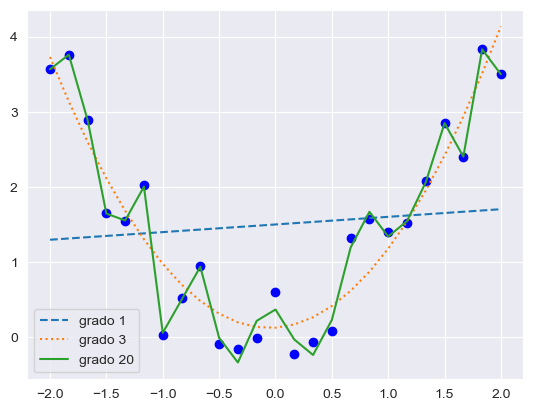

In [26]:
# Graficar los datos de muestra y los ajustes polinómicos
plt.scatter(x, y, color='blue')
plt.plot(x, f1(x), label='grado 1',linestyle='--')
plt.plot(x, f3(x), label='grado 3',linestyle=':')
plt.plot(x, f20(x), label='grado 20')
plt.legend(loc='best')
plt.show()

Podemos ver que el polinomio de grado 1 (linea azul) no describe bien los datos de entrenamiento. El mejor ajuste parece ser el polinomio de grado 20 (linea verde), que pasa exactamente por cada punto de datos de entrenamiento, pero si eligiéramos unos pocos puntos más, es muy probable que se desvíe bastante de ellos. Y el polinomio de grado 3 (linea naranja) alcanza un buen equilibrio; está bastante cerca de cada punto, y si estos datos son representativos, es probable que la línea también esté cerca de nuevos puntos de datos.
Claramente, los modelos demasiado complejos llevan a lo que se llama sobreajuste y no generalizan bien más allá de los datos en los que se entrenaron. 

### Tradeoff entre varianza y sesgo

El tradeoff entre varianza y sesgo es un concepto fundamental en el aprendizaje automático y en la estadística. El sesgo se refiere a la diferencia entre el valor predicho de un modelo y el valor real, mientras que la varianza se refiere a la variabilidad del valor del modelo para diferentes conjuntos de datos (entrenamiento y testeo). En general, los modelos con alto sesgo tienen una tendencia a subestimar o sobreestimar los valores, mientras que los modelos con alta varianza son muy sensibles a las variaciones en los datos de entrenamiento y tienen una tendencia a sobreajustar los datos de entrenamiento.

En el contexto del tradeoff entre varianza y sesgo, lo que se busca es encontrar un equilibrio óptimo entre estos dos factores. Un modelo con bajo sesgo y baja varianza generalmente se considera un modelo ideal, pero a menudo es difícil lograr este equilibrio óptimo en la práctica. Por lo tanto, es importante encontrar el equilibrio adecuado que se ajuste a las necesidades específicas de la aplicación en cuestión, ya que un modelo con alto sesgo y baja varianza puede ser preferible en algunas aplicaciones, mientras que un modelo con baja sesgo y alta varianza puede ser preferible en otras.

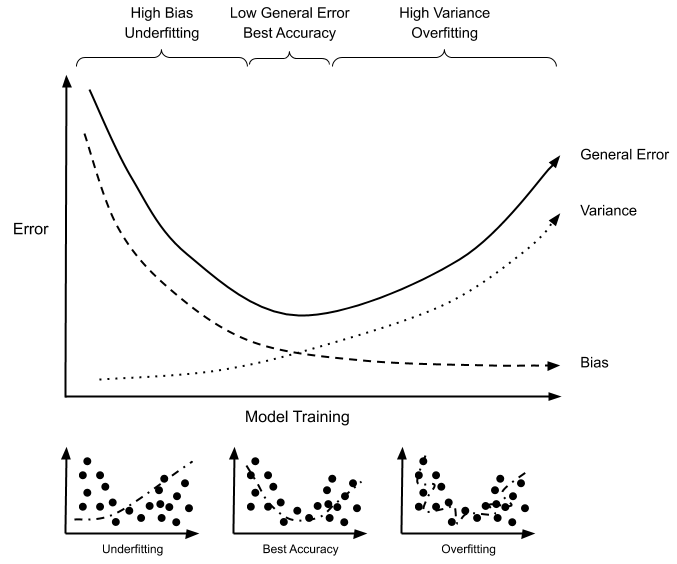


A partir de los datos determinemos la curva del error vs complejidad del modelo (grado del polinomio).

Para eso necesitamos saber cuando es el residuo de cada ajuste polinomico:
Returns


```
p : ndarray, shape (M,) or (M, K)
    Polynomial coefficients, highest power first.
    If `y` was 2-D, the coefficients for `k`-th data set are in ``p[:,k]``.

residuals, rank, singular_values, rcond : present only if `full` = True
    Residuals of the least-squares fit, the effective rank of the scaled
    Vandermonde coefficient matrix, its singular values, and the specified
    value of `rcond`. For more details, see `linalg.lstsq`.
```

Entonces, determinen los residuos vs el grado del polinomio para utlizando la siguiente estructura.

```
 p, res, _, _, _ = numpy.polyfit(x, y, deg, full=True)
```

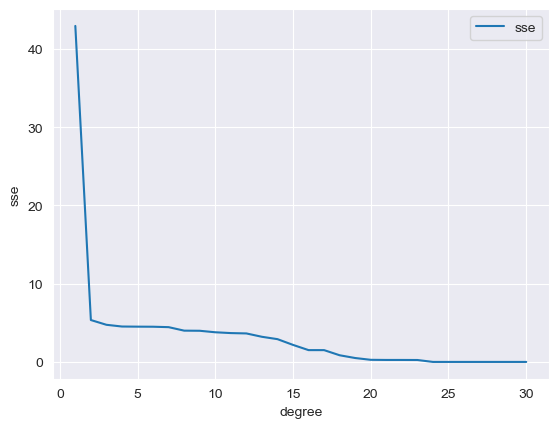

In [27]:
#Calcule los residuos para polinomios entre grado 1 y 30.
#Grafique la cantidad de residuos vs el grado del polinomio.

grados_errores = pd.DataFrame(columns=["degree", "sse"]) #SSE = Sum Square Error
lista= []

for degree in range(1,31):

    p, res, _, _, _ = np.polyfit(x, y, degree, full=True)
    dict = {"degree": degree,
            "sse": res[0] if len(res)>0 else 0 }
    lista.append(dict)

grados_errores = pd.DataFrame.from_dict(lista)

grados_errores.plot(kind="line", x="degree")
plt.ylabel('sse')
plt.show()




Entonces, **¿cómo aseguramos que nuestros modelos no sean demasiado complejos?**

El enfoque más fundamental implica el uso de diferentes datos para entrenar y probar el modelo. La forma más sencilla de hacerlo es **dividir el conjunto de datos**, de manera que, por ejemplo, dos tercios se usen para entrenar el modelo, después de lo cual medimos el rendimiento del modelo en el tercio restante: **separación de los datos entre train y test**.

### Separación de datos (train/test) 
Por lo que vimos, antes de ajustar un modelo a los datos, debemos separarlos en conjuntos de entrenamiento y prueba. Podemos hacer esto fácilmente utilizando la función train_test_split de sklearn. Sin embargo, para este ejemplo, haremos la separación manualmente:

In [28]:
np.random.seed(42) # para reproducibilidad
n = df_diabetes.shape[0]
idx_train = np.random.choice(n, size=int(0.8*n), replace=False)
idx_test = np.setdiff1d(np.arange(n), idx_train)

X_train = df_diabetes.iloc[idx_train][['bmi']].values
y_train = df_diabetes.iloc[idx_train]['target'].values

X_test = df_diabetes.iloc[idx_test][['bmi']].values
y_test = df_diabetes.iloc[idx_test]['target'].values

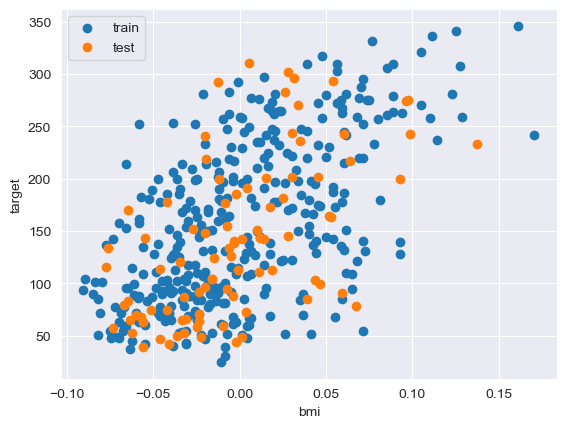

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

### Ajustando un modelo de regresión simple

Ahora que hemos cargado los datos y los hemos separado en conjuntos de entrenamiento y prueba, podemos ajustar un modelo de regresión lineal simple utilizando la función linregress de la biblioteca scipy:

In [30]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(X_train.squeeze(), y_train)
print(slope, intercept, r_value, p_value, std_err)

943.0874386578733 154.6348443243342 0.5891667321898743 2.2909170847687952e-34 69.0363338890789


Aquí, `slope` es la pendiente de la recta, `intercept` es la intersección con el eje y, `r_value` es el coeficiente de correlación de Pearson, `p_value` es el valor p asociado al coeficiente de correlación, y std_err es el error estándar de la pendiente.

Podemos usar estos parámetros para graficar la recta ajustada:

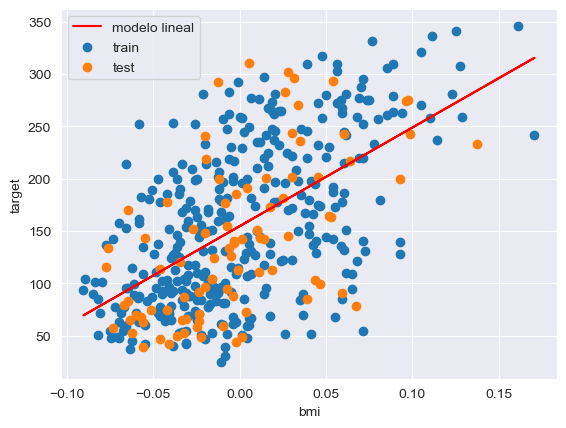

In [31]:
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_train, slope*X_train + intercept, color='red', label='modelo lineal')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend()
plt.show()

---
# Regresión múltiple

La regresión lineal múltiple es una técnica estadística utilizada para analizar la relación entre una variable de respuesta y dos o más variables predictoras. La idea principal de la regresión lineal múltiple es encontrar la mejor ecuación lineal que pueda describir la relación entre las variables predictoras y la variable de respuesta.

En la regresión lineal múltiple, el modelo se ajusta a un conjunto de datos de entrenamiento y se utilizan los coeficientes resultantes de la ecuación lineal para hacer predicciones de valores de la variable de respuesta para nuevos valores de las variables predictoras. Los coeficientes pueden utilizarse para determinar la fuerza y la dirección de la relación entre la variable de respuesta y cada una de las variables predictoras, lo que puede proporcionar una comprensión más profunda de la relación entre estas variables.

## Visualización de los datos

Es importante visualizar los datos antes de hacer un modelo de regresión porque esto nos permite entender mejor la naturaleza de los datos y detectar posibles patrones y relaciones entre las variables. La visualización de los datos nos puede ayudar a identificar valores atípicos, valores faltantes, distribuciones no normales y otros problemas que pueden afectar la calidad de los modelos de regresión. Además, la visualización de los datos puede proporcionar una comprensión más intuitiva de la relación entre las variables predictoras y la variable de respuesta, lo que puede ayudarnos a tomar decisiones informadas sobre el tipo de modelo de regresión a utilizar y cómo interpretar los resultados.

<AxesSubplot:>

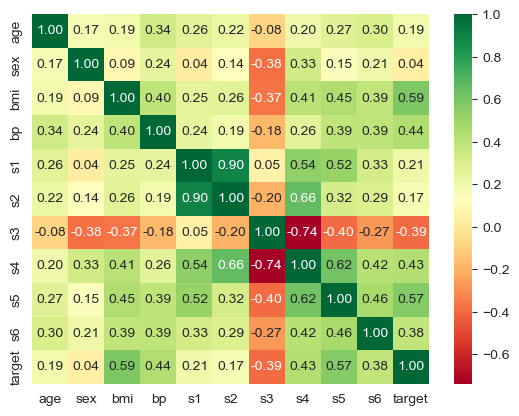

In [32]:
sns.heatmap(df_diabetes.corr(), cmap= 'RdYlGn', annot=True, fmt='.2f')

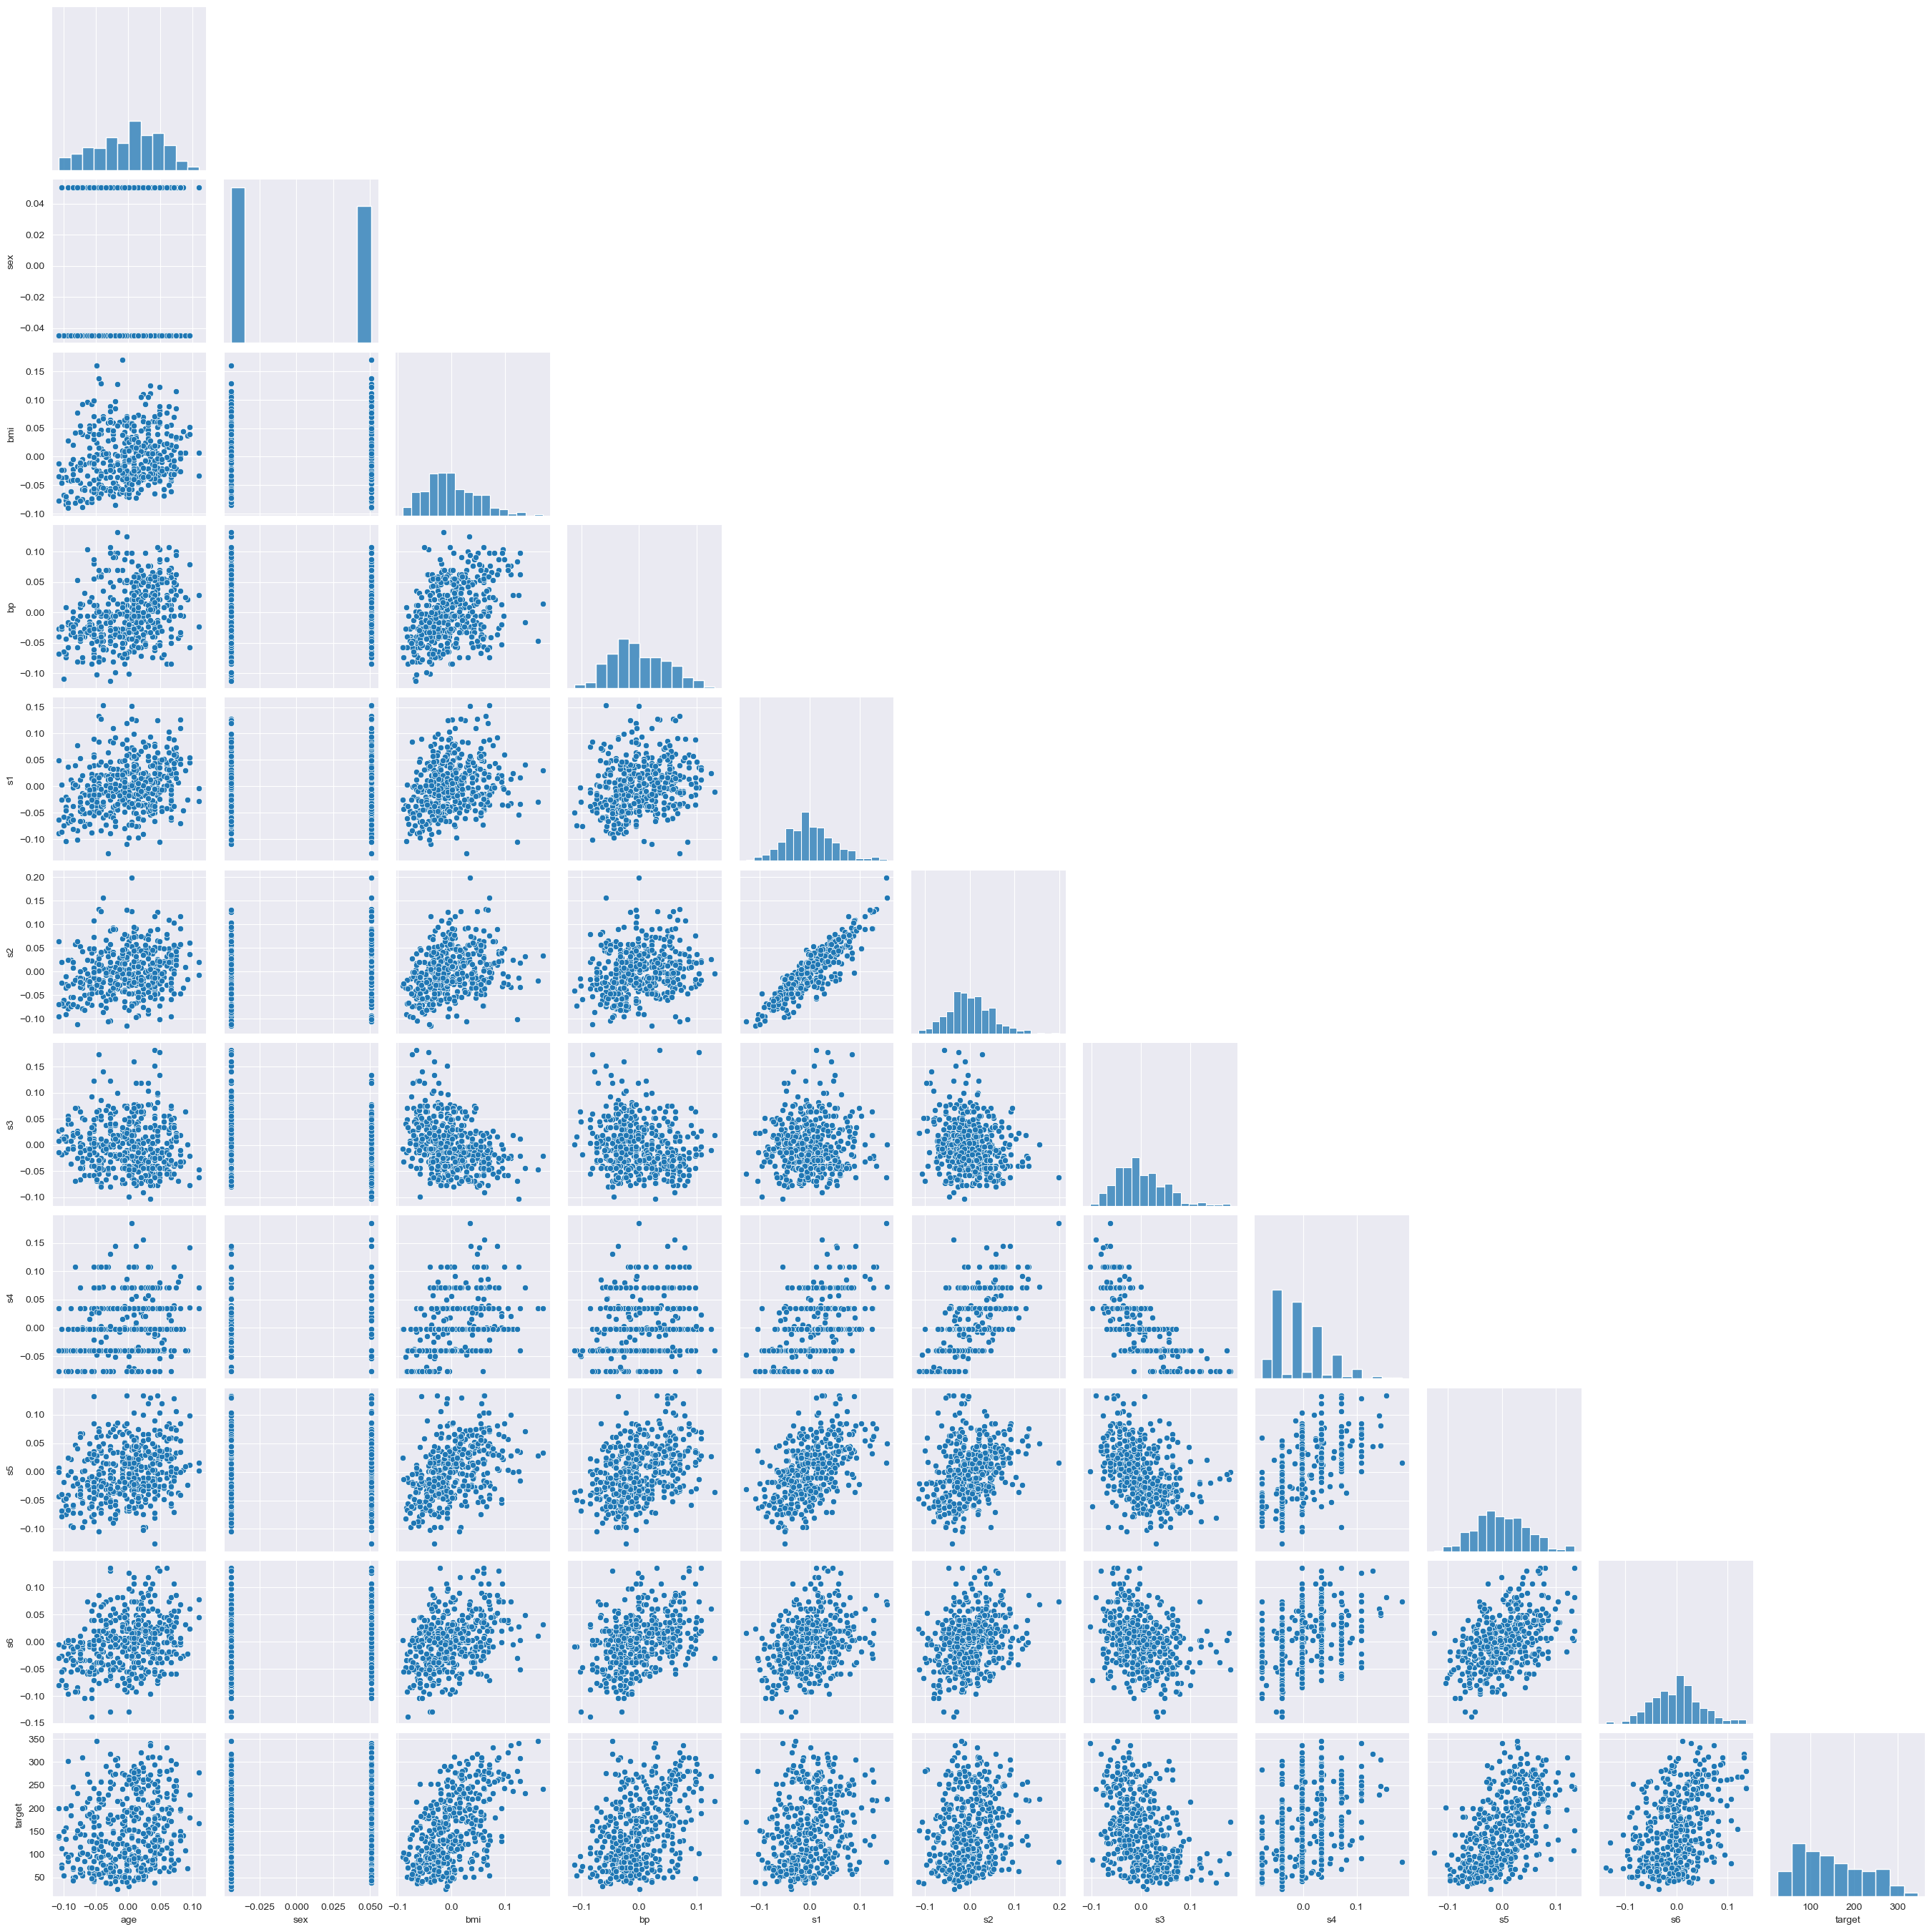

In [33]:
sns.pairplot(df_diabetes, corner=True)

Al inspeccionar los datos concluimos que las variables que tienen mayor dependencia lineal con el target son bmi, s5 y bp


In [34]:
X_train_single = (df_diabetes.iloc[idx_train][['bmi']].values)
y_train = df_diabetes.iloc[idx_train]['target'].values

X_train_multi = (df_diabetes.iloc[idx_train][['bmi']].values,
                 df_diabetes.iloc[idx_train][['bp']].values)

y_train = df_diabetes.iloc[idx_train]['target'].values

X_test_multi = (df_diabetes.iloc[idx_test][['bmi']].values,
                df_diabetes.iloc[idx_test][['bp']].values)
y_test = df_diabetes.iloc[idx_test]['target'].values

scipy.optimize.curve_fit se puede utilizar para ajustar datos 2D, pero los datos dependientes (salida de la función del modelo) aún deben ser 1D, como se indica en la documentación de scipy. Por lo que vamos a tener que usar algún "truco".

La función np.ravel() es una función de NumPy que se utiliza para aplanar matrices y arrays multidimensionales en un array unidimensional. Esta función devuelve una vista del array original y no modifica el array original. np.ravel() es útil cuando se trabaja con algoritmos de aprendizaje automático que requieren que los datos se presenten en una forma unidimensional.

https://stackoverflow.com/questions/73474275/scipy-curve-fit-error-result-from-function-call-is-not-a-proper-array-of-float

In [67]:
from scipy.optimize import curve_fit
import scipy

def fn_multi(x, a, b, c):
    return (a + b*x[0] + c*x[1]).ravel()

#BMI = x[0]
#BP  = x[1]

popt, pcov = curve_fit(fn_multi, X_train_multi, y_train)
print("Los parametros son: ",popt)
print("Mean Squared Error: ", np.mean((y_train-fn_multi(X_train_multi, *popt))**2))

Los parametros son:  [155.0716022  796.73975883 369.64912485]
Mean Squared Error:  3648.472657731109


Comparemos con un modelo que solamente considere un atributo y determinemos el error cuadrático medio




In [62]:
def fn_single(x, a, b):
    return (a + b*x[0]).ravel()

#BMI = x[0]


popt, pcov = curve_fit(fn_single, X_train_single, y_train)
print("Los parametros son: ",popt)
print("Mean Squared Error: ", np.mean((y_train-fn_single(X_train_single, *popt))**2))

Los parametros son:  [  236.55416335 13131.23453313]
Mean Squared Error:  5978.58535097786


C:\Users\igalk\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


¿Qué puede concluir al comparar el error cuadrático medio de un modelo con 1 y 2 atributos? ¿Cuál es mayor y cuál es menor? ¿Por qué?

Ahora genere un modelo que considere 4 atributos y determine el error cuadrático medio

In [72]:
#Genere el conjunto de entrenamiento que considere los atributos bpi, bp, s4 y s5
#Genere un modelo lineal que considere estos 4 parámetros
#Determine el Error cuadrático medio
X_train_multi = (df_diabetes.iloc[idx_train][['bmi']].values,
                 df_diabetes.iloc[idx_train][['bp']].values,
                 df_diabetes.iloc[idx_train][['s5']].values)

y_train = df_diabetes.iloc[idx_train]['target'].values

def fn_multi_4(x, a, b, c, d):
    return (a + b*x[0] + c*x[1] + d*x[2]).ravel()

#BMI = x[0]
#BP  = x[1]

popt, pcov = curve_fit(fn_multi_4, X_train_multi, y_train)
print("Los parametros son: ",popt)
print("Mean Squared Error: ", np.mean((y_train-fn_multi_4(X_train_multi, *popt))**2))

Los parametros son:  [154.62491303 592.40854988 212.59765336 605.56806402]
Mean Squared Error:  3014.7959499861513


---
# Búsqueda de hiperparámetros y validación cruzada

## Definición de hiperparámetros y regularización

Antes de continuar, es importante definir qué son los **hiperparámetros** del modelo y cómo difieren de los **parámetros** (aprendibles). Los *hiperparámetros son aquellos que no se aprenden a partir de los datos, sino que se fijan antes de ajustar el model*o. En contraste, los parámetros aprendibles son aquellos que se ajustan a partir de los datos durante el proceso de entrenamiento del modelo.

En el caso de la regresión lineal simple, un ejemplo de hiperparámetro es el nivel de confianza para el intervalo de confianza de los coeficientes. Este nivel se fija antes de ajustar el modelo y no se ajusta durante el proceso de entrenamiento.


### Regularización: Regresión Lasso

Regresion clásica:

\begin{equation}
y = \beta_0 + \beta_1x + \beta_2x_2 + \dots + \beta_p x_p 
  = \beta_0 + \sum_{j=1}^{p} \beta_j x_j 
\end{equation}

El modelo de regresión Lasso lo que hace es penalizar la función de pérdida cuadrática con el valor absoluto de los parámetros, entonces en vez de quedar:

\begin{equation}
\cal L(\beta) = \sum_{i=1}^{n} \big (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2
\end{equation}

Lasso queda de la siguiente manera:

\begin{equation}
\cal L(\beta, \lambda) = \sum_{i=1}^{n} (y_i - (\beta_0 + \sum_{j=1}^{p} \beta_j x_{ij})) ^2 + \lambda \sum_{j=1}^{p} |\beta_j|
\end{equation}

donde:

- $y$ es la variable de respuesta
- $\beta_0$ es el intercepto
- $x_j$ es la $j$-ésima variable predictora/feature
- $\beta_j$ es el coeficiente correspondiente a la $j$-ésima variable predictora
- $\lambda$ es el **hiperparámetro** de regularización que controla la fuerza de la penalización de la magnitud de los coeficientes.

*Nota*: La última parte de la ecuación, $\sum_{j=1}^{p} |\beta_j|$, es la función de penalización L1 regulada por $\lambda>0$ que obliga a algunos coeficientes a ser exactamente cero, lo que conduce a una selección de features integrada.

In [74]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [75]:
# Carga del conjunto de datos de diabetes
diabetes_data = load_diabetes()

In [76]:
df_diabetes = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
df_diabetes['target'] = diabetes_data['target']

In [77]:

X = df_diabetes[['bmi']].values
y = df_diabetes['target'].values

# Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un objeto de regresión Lasso
alpha = 0.1  # Fijo un valor de alpha
lasso_reg = Lasso(alpha=alpha, max_iter=10000)

# Entrenar el modelo de regresión Lasso
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [78]:
# Podemos evaluar el modelo
lasso_reg.__dict__

{'alpha': 0.1,
 'l1_ratio': 1.0,
 'fit_intercept': True,
 'normalize': False,
 'precompute': False,
 'max_iter': 10000,
 'copy_X': True,
 'tol': 0.0001,
 'warm_start': False,
 'positive': False,
 'random_state': None,
 'selection': 'cyclic',
 'n_features_in_': 1,
 'n_iter_': 2,
 'coef_': array([953.70688097]),
 'dual_gap_': 0.0,
 'intercept_': 152.08123460692784}

In [80]:
# Para predecir usamos el metodo predict
y_pred = lasso_reg.predict(X_test)

# Evaluamos con R2 en test
print('Train: ',r2_score(y_train, lasso_reg.predict(X_train)))

# Evaluamos con R2 en test
print('Test:' ,r2_score(y_test, lasso_reg.predict(X_test)))

# Usando el score del modelo
# print(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train:  0.36498568318809566
Test: 0.24180564514696612


## Búsqueda de hiperparámetros en una grilla: Validación

![image.png](https://cdn.shortpixel.ai/spai/q_lossy+w_730+to_webp+ret_img/https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

In [81]:
# Separar los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print('Tamaño del conjunto de desarrollo: ' ,X_train.shape[0])
print('Tamaño del conjunto de test: ' ,X_test.shape[0])

# Creamos un conjunto de validación del conjunto de entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20)
print('Tamaño del conjunto de entrenamient: ' ,X_train.shape[0])
print('Tamaño del conjunto de validación: ' ,X_val.shape[0])

Tamaño del conjunto de desarrollo:  353
Tamaño del conjunto de test:  89
Tamaño del conjunto de entrenamient:  282
Tamaño del conjunto de validación:  71


In [82]:
alphas = [10e-8, 0.01, 0.1, 0.5, 1, 5, 10]

# Inicializar el modelo de regresión Lasso con OLS como método de ajuste
lasso = Lasso(alpha=0, fit_intercept=True)

# Entrenar y ajustar el modelo para cada valor de alfa
coef_list = []
intercept_list = []
train_scores = []
val_scores = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train.reshape(-1, 1), y_train)
    coef_list.append(lasso.coef_)
    intercept_list.append(lasso.intercept_)
    train_scores.append(lasso.score(X_train.reshape(-1, 1), y_train))
    val_scores.append(lasso.score(X_val.reshape(-1, 1), y_val))

Text(0.5, 1.0, '$R^2$')

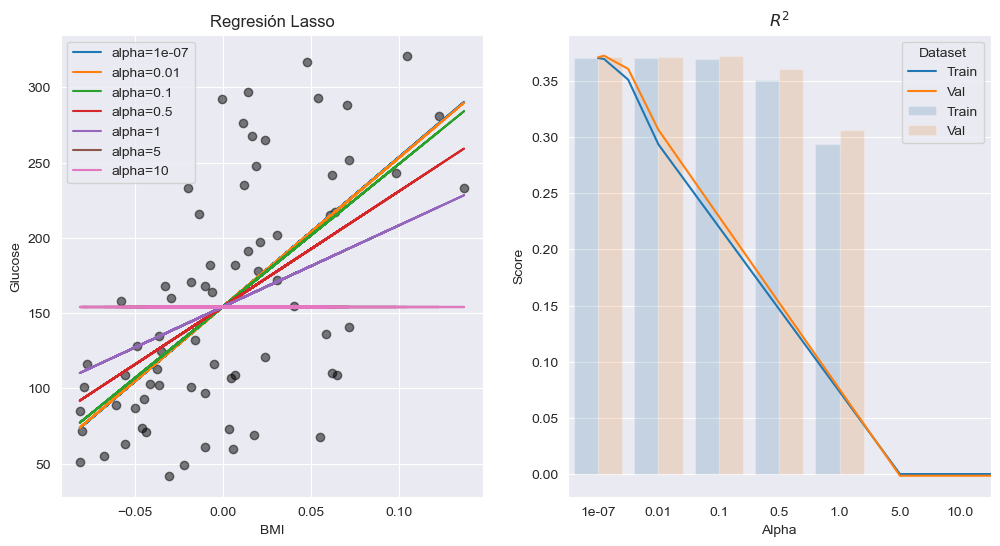

In [87]:
# Configurar el tamaño de la figura y los subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Gráfico de dispersión para las rectas resultantes
axs[0].scatter(X_val, y_val, color='black', alpha=0.5)
axs[0].set_xlabel('BMI')
axs[0].set_ylabel('Glucose')
axs[0].set_title('Regresión Lasso')

# Agregar las rectas resultantes para cada valor de alfa
for i, alpha in enumerate(alphas):
    axs[0].plot(X_val, X_val*coef_list[i]+intercept_list[i], label=f'alpha={alpha}')
axs[0].legend()

# Gráfico de barras para las métricas de entrenamiento y prueba
df = pd.DataFrame({'Train': train_scores, 'Val': val_scores}, index=alphas)
df = df.stack().reset_index()
df.columns = ['Alpha', 'Dataset', 'Score']
sns.lineplot(data=df, x='Alpha', y='Score', hue='Dataset', ax=axs[1])
sns.barplot(data=df, x='Alpha', y='Score', hue='Dataset', ax=axs[1], alpha=0.2)
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Score')
axs[1].set_title('$R^2$')

Con validación elegiremos el mejor modelo y reportaremos los resultados finales en el conjunto de test.

In [105]:
best_alpha = pd.DataFrame([alphas, val_scores]).T.sort_values(1, ascending=False).reset_index()[0][0]


0.1

In [107]:
lasso_best = Lasso(alpha=best_alpha, fit_intercept=True)
lasso_best.fit(X_train, y_train)
print("R2 del mejor modelo: ",lasso_best.score(X_test, y_test))

R2 del mejor modelo:  0.2219414157886206


¿Encuentran algún problema con este enfoque?

## Validación cruzada

Aunque muchas veces con hacer una separación en tres conjuntos de datos: entrenamiento, validación y testeo, esto puede no ser suficiente cuanto tenemos pocos datos. Para crear buenos modelos, queremos utilizar la mayor cantidad posible de datos para el entrenamiento disponibles. Sin embargo, si el conjunto de validación es pequeño, proporcionará una estimación relativamente ruidosa del rendimiento predictivo. Una solución a este dilema es la **validación cruzada**.

La **validación cruzada** o **K-fold cross-validation** es necesaria porque el objetivo del aprendizaje automático es construir modelos que puedan generalizar a datos nuevos que no han sido vistos previamente. Si se evalúa el modelo solo en el conjunto de entrenamiento, el modelo podría sobreajustarse (ajustarse demasiado a los datos de entrenamiento) y no ser capaz de generalizar bien a datos nuevos.

Con la validación cruzada, se puede evaluar el rendimiento del modelo en datos que no se utilizaron para entrenar el modelo, lo que permite estimar el rendimiento del modelo en datos nuevos. Además, la validación cruzada permite comparar diferentes modelos y seleccionar el mejor modelo en función de su capacidad de generalización.

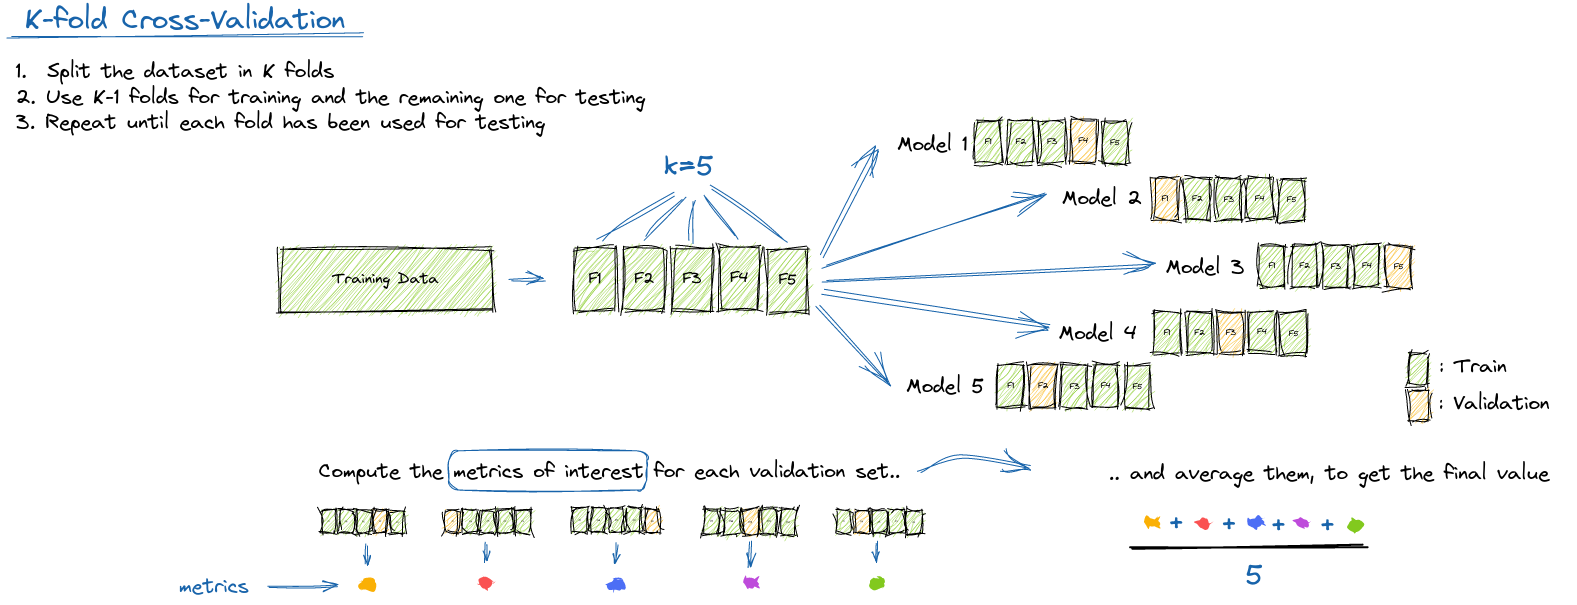

In [ ]:
# Carga del conjunto de datos de diabetes
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data['data'], columns=diabetes_data['feature_names'])
df_diabetes['target'] = diabetes_data['target']

X = df_diabetes[['bmi']].values
y = df_diabetes['target'].values

In [108]:
# Definir número de folds
n_folds = 5
kf = KFold(n_splits=n_folds)

# Listas para almacenar resultados
train_scores_mse = []
val_scores_mse = []
train_scores_r2 = []
val_scores_r2 = []

# Loop de validación cruzada
for i, (train_index, val_index) in enumerate(kf.split(X)):
    # Dividir datos en train y test
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    print(f"----- Fold {i} -----")
    print("Tamaños:")
    print(f"X_train: {X_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"y_val: {X_train.shape}")

    # Entrenar modelo de regresión lineal
    slope, intercept, r_value, p_value, std_err = stats.linregress(X_train.squeeze(), y_train)
    
    # Calcular predicciones
    y_train_pred = intercept + np.dot(X_train, slope)
    y_val_pred = intercept + np.dot(X_val, slope)
    
    # Errores
    train_mse = np.mean((y_train_pred - y_train)**2)
    val_mse = np.mean((y_val_pred - y_val)**2)
    train_r2 = r_value**2
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Almacenar resultados
    train_scores_mse.append(train_mse)
    val_scores_mse.append(val_mse)
    train_scores_r2.append(train_r2)
    val_scores_r2.append(val_r2)

print("----- ----- -----")

# Ordenemos todo en un dataframe
results = pd.DataFrame({
    'fold': range(1, n_folds + 1),
    'train_mse': train_scores_mse,
    'val_mse': val_scores_mse,
    'train_r2': train_scores_r2,
    'val_r2': val_scores_r2
})

results.head()

----- Fold 0 -----
Tamaños:
X_train: (353, 1)
y_train: (353,)
y_val: (353, 1)
----- Fold 1 -----
Tamaños:
X_train: (353, 1)
y_train: (353,)
y_val: (353, 1)
----- Fold 2 -----
Tamaños:
X_train: (354, 1)
y_train: (354,)
y_val: (354, 1)
----- Fold 3 -----
Tamaños:
X_train: (354, 1)
y_train: (354,)
y_val: (354, 1)
----- Fold 4 -----
Tamaños:
X_train: (354, 1)
y_train: (354,)
y_val: (354, 1)
----- ----- -----


,fold,train_mse,val_mse,train_r2,val_r2
0,1,8297.968666,6458.487422,0.360394,0.206698
1,2,7715.152131,8592.687940,0.332550,0.370015
2,3,7786.074228,8229.063579,0.331520,0.389373
3,4,8244.169467,7053.759518,0.353476,0.293610
4,5,7752.492394,8982.952221,0.338384,0.362541


Hagamos un lindo gráfico!

<AxesSubplot:xlabel='fold', ylabel='value'>

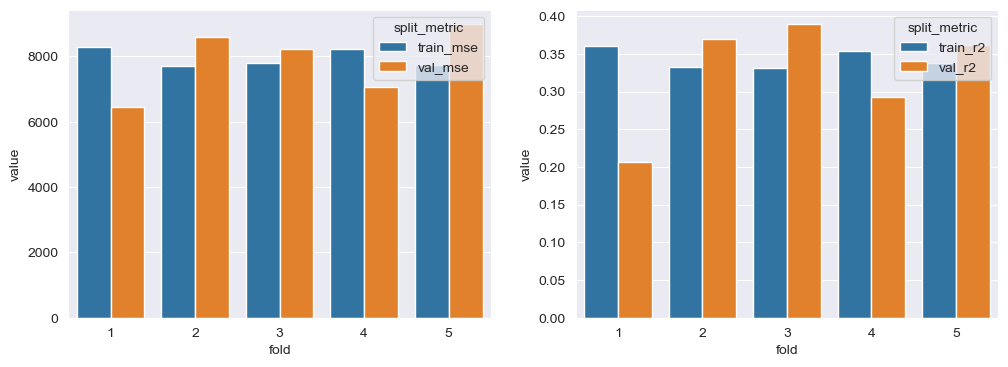

In [109]:
# Graficar resultados
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# derretir el DataFrame para facilitar la visualización con Seaborn
results_melt = results.melt(id_vars=['fold'], var_name='split_metric', value_name='value')

# crear el gráfico de barras agrupadas
axs[0].set_ylabel('MSE')
sns.barplot(x='fold', y='value', hue='split_metric',
            data=results_melt[results_melt['split_metric'].isin(['train_mse', 'val_mse'])], ax=axs[0])

axs[1].set_ylabel('$R^2$')
sns.barplot(x='fold', y='value', hue='split_metric',
            data=results_melt[results_melt['split_metric'].isin(['train_r2', 'val_r2'])], ax=axs[1])

## Tipos de búsqueda y de validación cruzada

En general el esquema que vamos a utilizar es una combinacion de `train_test_split` para generar un conjunto `held-out` o test que no utilizaremos hasta el final del pipeline del desarrollo del modelo y lo combinaremos con validación cruzada para generar estimaciones confiables del error para cada posible hiperparámetro.

![image.png](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

*Fuente: scikit-learn.org*

Dentro del conjunto de desarrollo podremos hacer un **K-fold CV** clásico u otro paradigma como por ejemplo [**Leave-One-Out CV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut) o [**Grouped CV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html). Incluso a veces será necesario [estratificar](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) en problemas de clasificación para mantener clases balanceadas.

![image.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

*Fuente: scikit-learn.org*

Y a la vez ahi adentro podremos hacer una búsqueda extensiva de hiperparámetros: **GridSearch** o realizar una búsuqueda aleatorizada en la cual podemos muestrearlos de una distribución: **RandomSearch**. Más adelante en el curso veremos detalles de como realizar todo esto con scikit-learn y ejemplos.

---
# Ejercicio: Red Wine Quality Dataset

El conjunto de datos de calidad de vinos (descargar del campus) contiene información sobre dos variantes del vino portugués "Vinho Verde": vino tinto y vino blanco. Los datos se recopilaron a través de pruebas fisicoquímicas y sensoriales de los vinos. Debido a problemas de privacidad y logística, solo se proporcionan variables de entrada fisicoquímicas y variables de salida sensoriales. No se proporcionan datos sobre el tipo de uva, la marca del vino, el precio de venta, entre otros.

El conjunto de datos se puede utilizar para tareas de clasificación o regresión, donde la variable de salida es la calidad del vino, que se puntúa en una escala de 0 a 10. La variable de salida se puede ver como un problema de regresión. Las clases no están balanceadas y están ordenadas, por lo que se pueden usar algoritmos de detección de valores atípicos para detectar los vinos excepcionales o pobres. También se desconoce si todas las variables de entrada son relevantes, por lo que se puede probar métodos de selección de características.

El conjunto de datos contiene 11 variables de entrada fisicoquímicas, que son:

- Acidez fija (fixed acidity)
- Acidez volátil (volatile acidity)
- Ácido cítrico (citric acid)
- Azúcar residual (residual sugar)
- Cloruros (chlorides)
- Dióxido de azufre libre (free sulfur dioxide)
- Dióxido de azufre total (total sulfur dioxide)
- Densidad (density)
- pH (pH)
- Sulfatos (sulphates)
- Alcohol (alcohol)

La variable de salida es la calidad del vino (**quality**), que se puntúa en una escala de 0 a 10 en función de los datos sensoriales.


**Papeles relevantes:**

P. Cortez, A. Cerdeira, F. Almeida, T. Matos y J. Reis. Modelado de preferencias de vino mediante minería de datos a partir de propiedades fisicoquímicas. En Decision Support Systems, Elsevier, 47(4): 547-553, 2009.

In [76]:
#**Ejercicios**

import pandas as pd
from scipy.stats import linregress
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [2]:
#1. Cargue los datos con Pandas. ¿Qué tipo de dato es cada una de las columnas?
wine_df= pd.read_csv(r"C:\Users\igalk\OneDrive\Documentos\laburo\Data Mining FCEyN\MachineLearning\Lesson 3\winequality-red.csv")
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


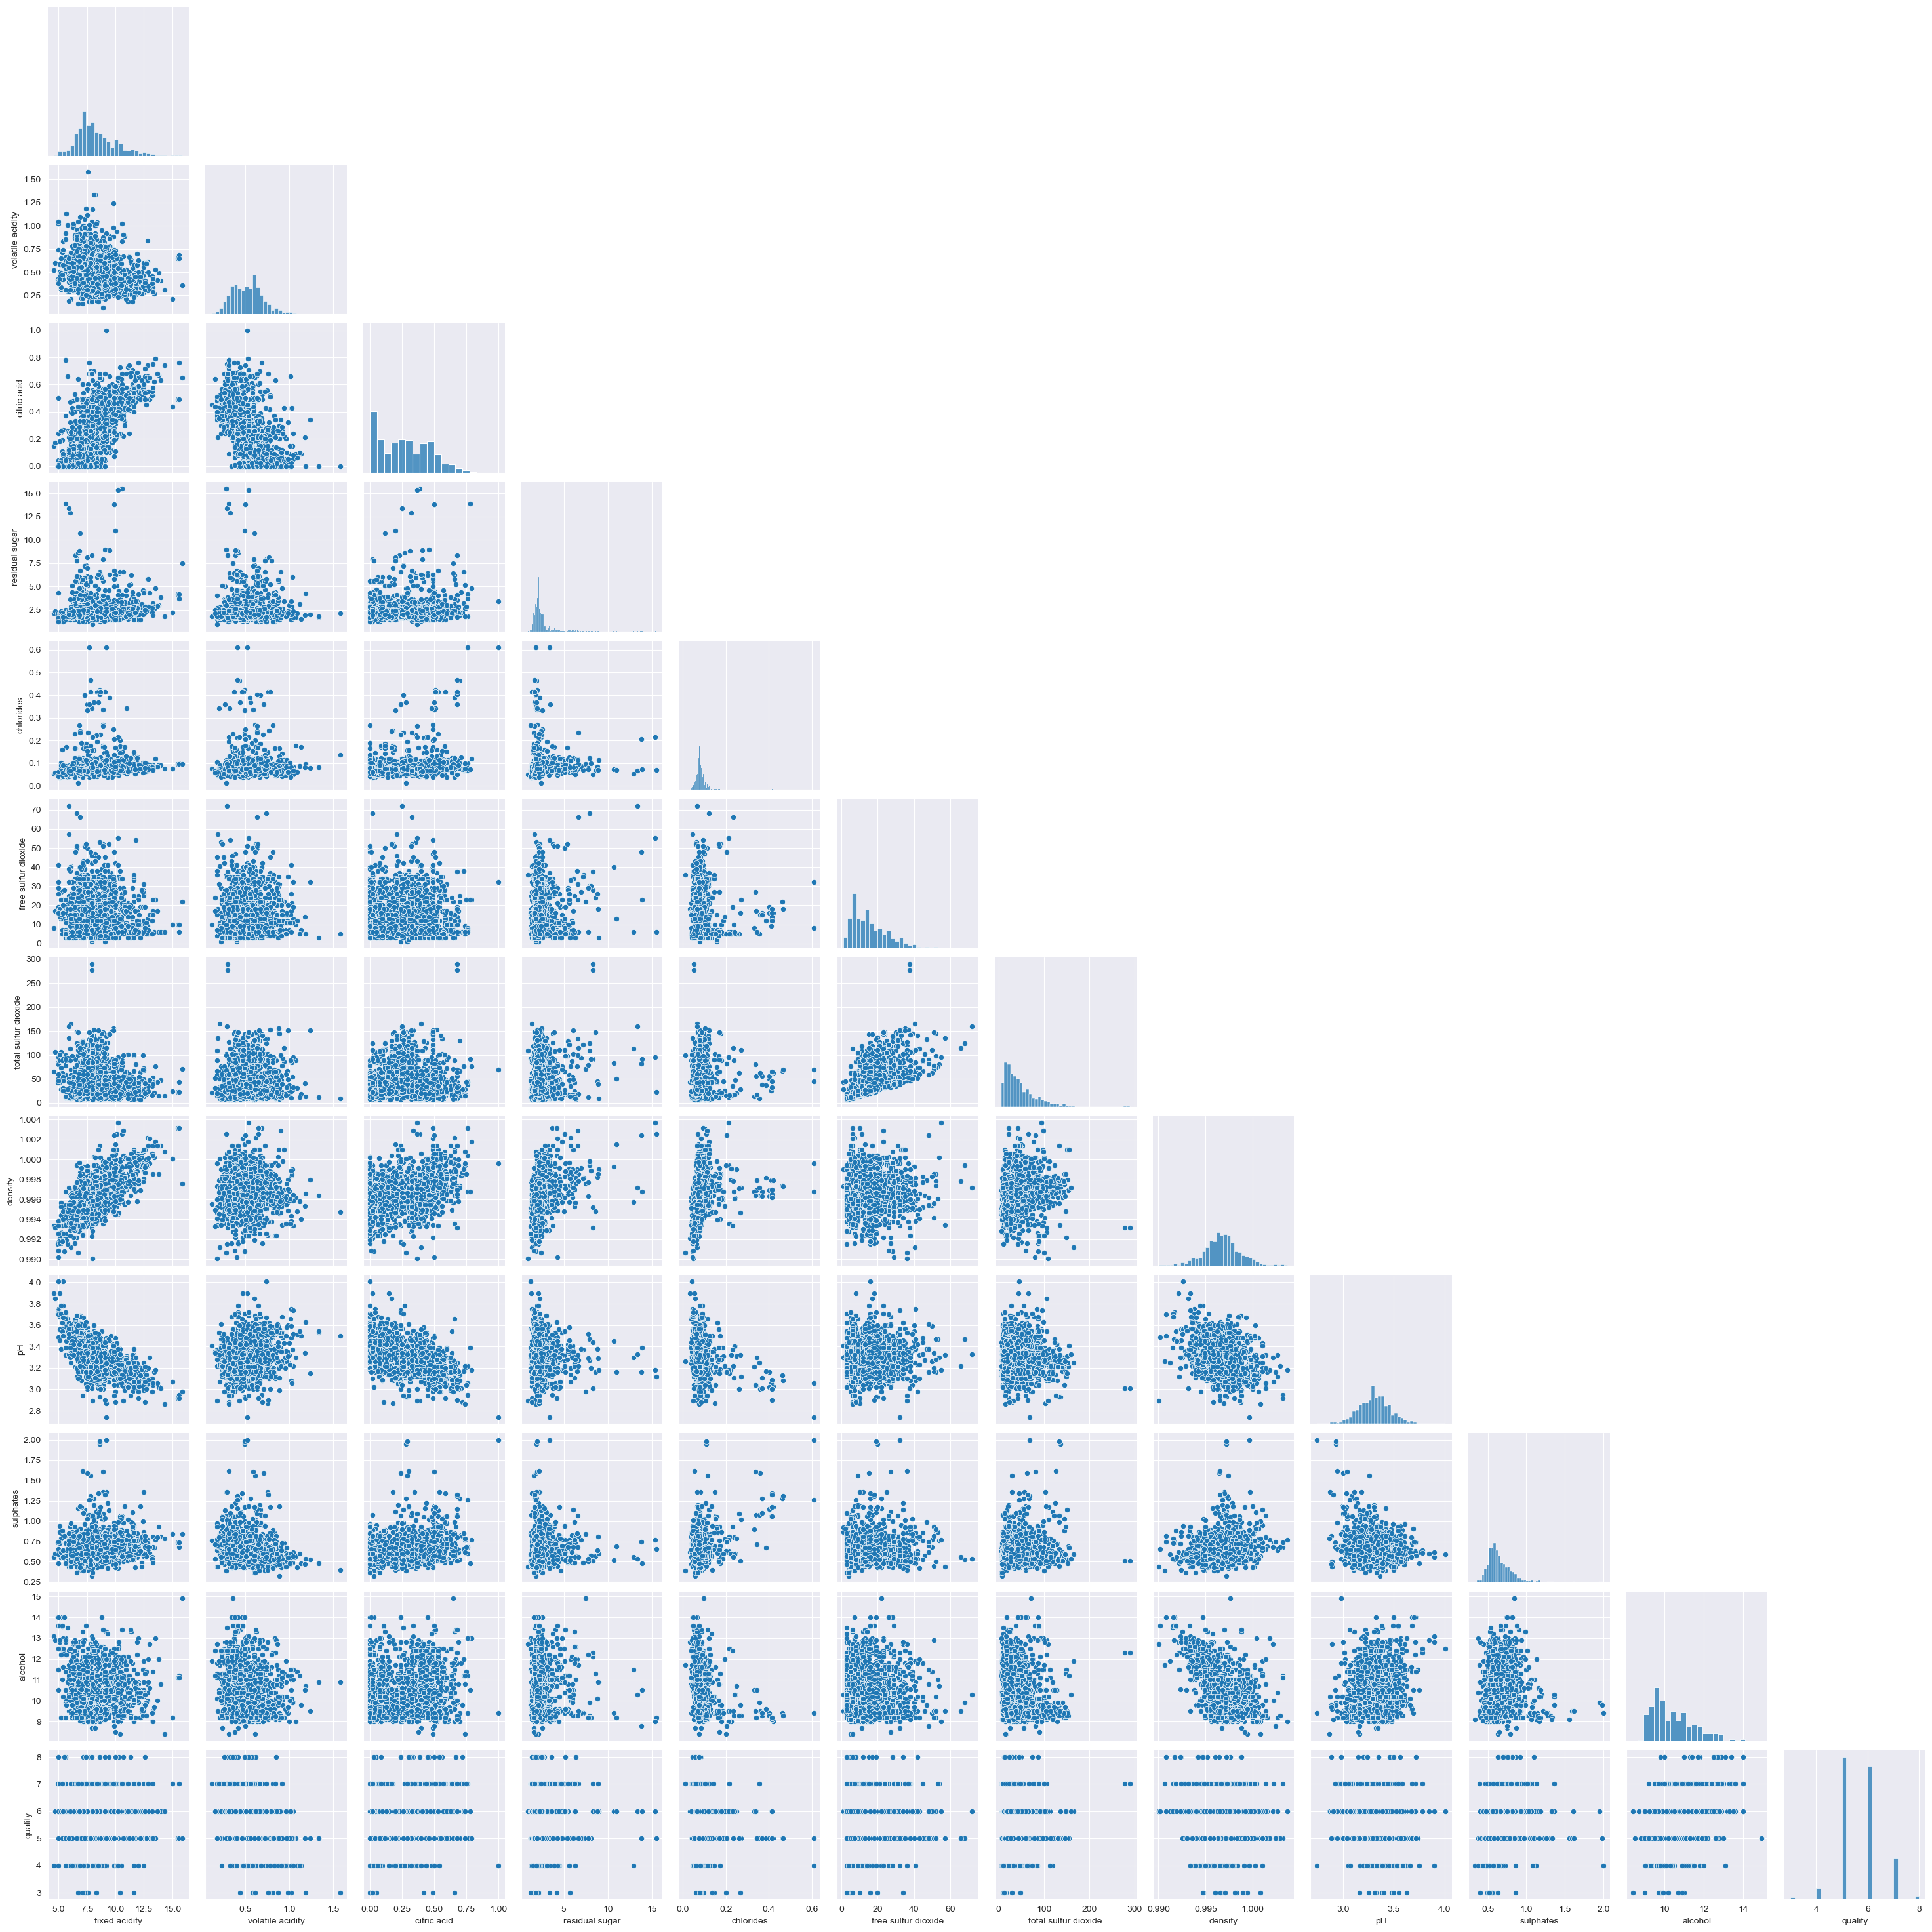

In [5]:
# 2. Genere algún gráfico de distribución para cada feature que sea numérica. ¿Qué tipo de dato es la variable objetivo o target?

sns.pairplot(wine_df, corner=True)

In [125]:
# 3. Cree un conjunto de datos de test con el 20% de los datos, randomice el dataset

columnas = wine_df.columns.drop("quality")
X = wine_df[columnas]
y=wine_df[["quality"]]

X_train, X_test, y_train_1d, y_test_1d = train_test_split(X, y, test_size=0.2, random_state=123)


In [91]:
# 4. Para cada una de las features mencionadas, ajuste una regresion lineal y calcule el error cuadrático medio.


def fn_simple(x, a, b):
    return (a + b*x[0]).ravel()


results= pd.DataFrame(columns=["model", "MSE_train", "MSE_test", "params"])
lista=[]

# y_train_1d = y_train[["quality"]].values
# y_test_1d = y_test[["quality"]].values

for model in X.columns:
    X_train_1d =  X_train[[model]].values
    X_test_1d =  X_test[[model]].values

    popt, pcov = curve_fit(fn_simple, X_train_1d, y_train_1d.squeeze())
    train_mse =  np.mean((y_train_1d-fn_simple(X_train_1d, *popt))**2)

    #uso los mismos parametros(popt) para X_test y evaluo el error con y_test
    test_mse =  np.mean((y_test_1d-fn_simple(X_test_1d, *popt))**2)


    dict={"model": model,
          "params": popt,
          "MSE_train": train_mse[0],
          "MSE_test": test_mse[0]

          }
    lista.append(dict)

results = pd.DataFrame.from_dict(lista).sort_values("MSE_test", ascending=True)
display(results)

C:\Users\igalk\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\igalk\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\igalk\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\igalk\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFram

,model,params,MSE_train,MSE_test
6,total sulfur dioxide,"[-570.771840774761, 72.05044804054711]",0.648594,0.664510
7,density,"[302.1531501839362, -297.9096655942325]",0.648594,0.856295
0,fixed acidity,"[-705.2320230768331, 71.80442104187368]",0.648594,51.916226
4,chlorides,"[-67.69271082158279, 1004.444612349567]",0.648594,65.578271
8,pH,"[-231.95230152936853, 75.42350693758844]",0.648594,184.398054
9,sulphates,"[-84.63972239628268, 123.65954274950614]",0.648594,186.275546
1,volatile acidity,"[-71.14956168957319, 239.94157638859946]",0.648594,1127.638390
2,citric acid,"[246.21660053163328, -429.61582036400165]",0.648594,2656.264111
10,alcohol,"[-811.5812595115177, 71.68535129354406]",0.648594,3287.037662
3,residual sugar,"[-155.79801123359556, 80.71487739162127]",0.648594,5274.620128


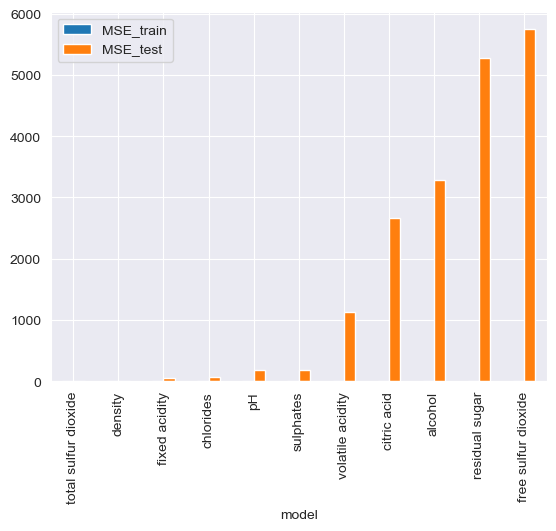

In [92]:
# 5. Realice un gráfico de barras donde se visualice el error para cada modelo, tanto en entrenamiento como en test

results[["model", "MSE_train","MSE_test"]].plot(kind="bar", xlabel="model", x="model")
plt.show()

6. ¿Cual fue el mejor modelo?
#El mejor modelo para predecir utilizando una sola variable es Volatile acidity

In [126]:
# 7. **(Avanzado)** Realice un ajuste utilizando las tres mejores feaures encontradas en el punto 5. Para esto usen el modelo de regresión lineal que aporta scikit-learn: [LinearRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). ¿Mejoró dicho modelo en comparación al mejor hallado en el punto 6? *Ayuda:* Para ver como utilizarlo mire el ejemplo de la regresión Lasso.

X_train_3f=X_train[["total sulfur dioxide",
                    "density", 'fixed acidity'
                    ]]
X_test_3f=X_test[["total sulfur dioxide",
                    "density", 'fixed acidity'
                    ]]

reg = LinearRegression().fit(X_train_3f, y_train_1d)
y_pred_train= reg.predict(X_train_3f)
MSE_train=mean_squared_error(y_train_1d, y_pred_train)

y_pred_test = reg.predict(X_test_3f)
MSE_test=mean_squared_error(y_test_1d, y_pred_test)

print(f"MSE_train: {MSE_train}; MSE_test: {MSE_test}. Mejora, pero había que ver si significativamente vs. 0.62 de 1 sola variable explicativa")


MSE_train: 0.5535959448251567; MSE_test: 0.5690752031110012. Mejora, pero había que ver si significativamente vs. 0.62 de 1 sola variable explicativa


In [ ]:
# 8. **(Avanzado)** Repita el ejercicio 7, pero para el entrenamiento utilice validación cruzada.

In [145]:
n_folds = 5
kf = KFold(n_splits=n_folds)

# Listas para almacenar resultados
results_cv = pd.DataFrame(columns=["model_cv", "MSE_train", "MSE_val", "MSE_test", "betas", "intercept"])
lista= []

for i, (train_index, val_index) in enumerate(kf.split(X_train_3f)):

    X_train_3f_cv = X_train_3f[X_train_3f.index.isin((train_index))]
    y_train_1d_cv = y_train_1d[y_train_1d.index.isin((train_index))]

    X_val_3f_cv = X_train_3f[X_train_3f.index.isin(list(val_index))]
    y_val_1d_cv = y_train_1d[y_train_1d.index.isin(list(val_index))]

    reg = LinearRegression().fit(X_train_3f_cv, y_train_1d_cv)
    y_pred_train_cv= reg.predict(X_train_3f_cv)
    MSE_train_cv=mean_squared_error(y_train_1d_cv, y_pred_train_cv)

    y_pred_val_cv = reg.predict(X_val_3f_cv)
    MSE_val_cv = mean_squared_error(y_val_1d_cv, y_pred_val_cv)

    y_pred_test = reg.predict(X_test_3f)
    MSE_test_cv=mean_squared_error(y_test_1d, y_pred_test)


    dict = {"model_cv": i,
            "MSE_train": MSE_train_cv,
            "MSE_val": MSE_val_cv,
            "MSE_test": MSE_test_cv,
            "betas": reg.coef_[0],
            "intercept": reg.intercept_[0]
            }

    lista.append(dict)


results = pd.DataFrame.from_dict(lista).sort_values("MSE_test", ascending=True)
display(results)

    #guardas los resultados de train y validación. te quedaás con los parámetros de la mejor validación y con eso vas a predecir los datos originales!

,model_cv,MSE_train,MSE_val,MSE_test,betas,intercept
3,3,0.546250,0.557845,0.568596,"[-0.0033869377653960005, -185.9645957137918, 0...",189.642339
2,2,0.552400,0.547817,0.571286,"[-0.0034456728002396665, -201.13277258613766, ...",204.609434
4,4,0.540983,0.581063,0.573793,"[-0.004040795452472297, -188.3423271693551, 0....",192.095348
0,0,0.575817,0.454634,0.584512,"[-0.0028789026871256012, -201.49637464568136, ...",205.319407
1,1,0.506286,0.746312,0.586482,"[-0.003011274521984348, -231.91789462508723, 0...",235.433819
